# Tarea 1 Redes Convolucionales

IIC-3697 Aprendizaje Profundo | Abril 2024

Profesor: Álvaro Soto

Ayudante: Brian Murtagh (bmurtagh@uc.cl)


In [1]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchsummary import summary

## Pregunta 1: SimpleCNN (30%)

## Actividad 1: CIFAR-10

In [2]:
transform1 = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values to [-1, 1]
])

In [3]:
"""
TAREA: Como primera tarea deben traer y cargar el dataset de entrenamiento y validación de CIFAR-10 utilizando la librería de torchvision.
Para el dataloader utilice un batch_size de 4.
"""

# Traer datasets

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform1)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform1)

# Crear Dataloaders

batch_train_size = 64
batch_test_size = 1024

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_train_size, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_test_size, shuffle=False, num_workers=4)

# Definir clases

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


**Responder brevemente aquí:**

*   *¿Que hace el parametro _shuffle_ en los DataLoaders de Pytorch, debemos usarlos para ambos datasets? ¿Por qué?*

El parámetro _shuffle_ sirve para poder randomizar el orden de los datos de entrenamiento antes de formar los _batches_ en cada época.
El beneficio que entrega es reducir el _overfitting_ al agregar aleatoriedad, por lo tanto evita que el
modelo aprenda la secuencia de datos y lo obliga a aprender features más robustas.

En el caso del set de prueba no es recomendable usarlo, debido a que queremos evaluar el rendimiento del
modelo sobre el dataset de manera determinística para asegurar resultados consistentes.


*   *¿Que hace la función ToTensor?¿Qué es un tensor y para que lo utilizamos en Pytorch?*

La función ToTensor convierte un objeto de tipo PIL Image o numpy array a un tensor de Pytorch. En este caso,,
convierte las imágenes a tensores, los cuales son una estructura de datos multi-dimensional (una matriz y un vector son tensores)
que se utiliza para manejar la información en Pytorch. Al usar esta función normalizamos las imágenes
a valores entre 0 y 1 para cada canal de cada pixel.



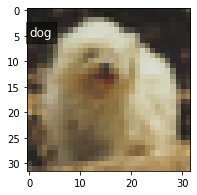

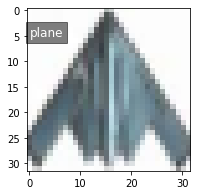

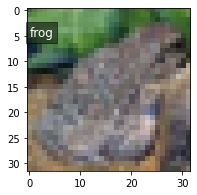

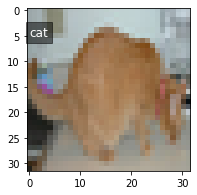

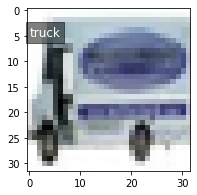

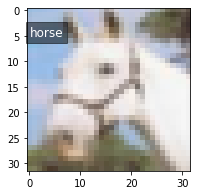

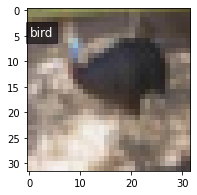

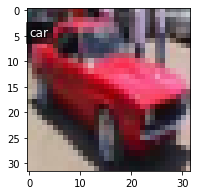

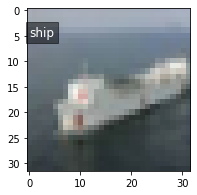

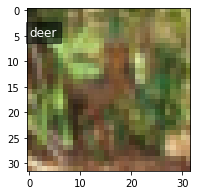

In [6]:
"""
TAREA: Muestra una imagen por cada clase del dataset CIFAR junto a su label
"""
def imshow(img, label):
    img = img / 2 + 0.5 # Desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.text(0, 5, label, fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.5))
    plt.show()

# Imagenes random de cada clase

dataiter = iter(train_loader)
images, labels = next(dataiter)

done = [False] * 10
for i in range(batch_train_size):
    if False not in done:
        break
    if done[labels[i]]:
        continue
    done[labels[i]] = True
    plt.figure(figsize=(3,3))
    imshow(images[i], classes[labels[i]])

<BarContainer object of 10 artists>

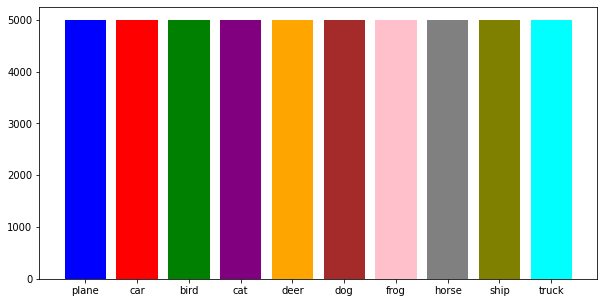

In [7]:
"""
Mostrar la distribución de clases en el dataset de entrenamiento
"""
# Contar cuantas imagenes hay de cada clase
class_count = [0] * 10
for _, labels in train_set:
    class_count[labels] += 1

# Mostrar gráfico
plt.figure(figsize=(10, 5))
plt.bar(classes, class_count, color=['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan'])

**Responder brevemente aquí:**

*   *¿Que podemos ver de las distribuciones? ¿Cuál es el impacto del balance de una base de datos en Deep Learning y CV (Computer Vision)?*

Podemos apreciar que en el set de entrenamiento es completamente uniforme en su distribución.
Esto es deseable para el aprendizaje debido a que de esta forma el modelo no tenderá a favorecer alguna clase por sobre las demás por el
simple hecho de que hay más ejemplos de esta clase. Esto pasaría ya que al tomar una imagen aleatoria
tendría más probabilidad de ser de la clase con más imágenes que de el resto.

## Actividad 2: Crear SimpleCNN

In [4]:
"""
TAREA: Ahora deben implementar una clase simple de una red convolucional en Pytorch según el diagrama del enunciado.
"""
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Defina los componentes de la CNN
        self.conv1 = nn.Conv2d(3, 6, 5) # 32x32x3 -> 28x28x6
        self.pool1 = nn.MaxPool2d(2, 2) # 28x28x6 -> 14x14x6
        self.conv2 = nn.Conv2d(6, 16, 5) # 14x14x6 -> 10x10x16
        self.pool2 = nn.MaxPool2d(2, 2) # 10x10x16 -> 5x5x16
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Conecte correctamente los componentes segun la arquitectura
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x


**Responder aquí:**

*   ¿Qué es el Max Pooling? ¿Para qué lo utilizamos en CNN?

El Max Pooling es una función que toma un _kernel_ y se desliza por la imagen tomando el valor máximo de cada región
que cubre el _kernel_. Esto se hace para reducir la dimensionalidad de la imagen y extraer características más generales
de la imagen. Además, ayuda a hacer el modelo más robusto a pequeñas variaciones en la posición de los features.

.


*   ¿Qué ventajas tiene usar ReLU en vez de una funciónde activación Sigmoide?

La función ReLU es más eficiente computacionalmente que la función sigmoide, ya que no tiene que calcular la exponencial.
Además, la función ReLU no sufre del problema de _vanishing gradient_ que tiene la función sigmoide, lo que permite
entrenar redes más profundas sin que el gradiente se haga muy pequeño.

.



## Actividad 3

In [5]:
"""
NO cambiar esta celda
"""
import torch.optim as optim

classifer_model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(classifer_model.parameters(), lr=0.001, momentum=0.9)

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
classifer_model.to(device)
summary(classifer_model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


In [53]:
"""
TAREA: Complete el loop de entrenamiento

TIP: recuerda debes utilizar optimizer, criterion y el modelo
"""

NUM_EPOCHS = 10
total_step = len(train_loader)

losses = []
for epoch in range(NUM_EPOCHS):
    for i, batch in enumerate(train_loader, 0):
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = classifer_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            # loss = criterion ;)
            print (f"Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i+1}/{total_step}] Loss: {loss.item():.4f}")        
    losses.append(loss.item())

print('Termina Entrenamiento!')

Epoch [1/10], Step [100/782] Loss: 0.8341
Epoch [1/10], Step [200/782] Loss: 0.7043
Epoch [1/10], Step [300/782] Loss: 0.5176
Epoch [1/10], Step [400/782] Loss: 0.6514
Epoch [1/10], Step [500/782] Loss: 0.5678
Epoch [1/10], Step [600/782] Loss: 0.7447
Epoch [1/10], Step [700/782] Loss: 0.8143
Epoch [2/10], Step [100/782] Loss: 0.7691
Epoch [2/10], Step [200/782] Loss: 0.6410
Epoch [2/10], Step [300/782] Loss: 0.5025
Epoch [2/10], Step [400/782] Loss: 0.6425
Epoch [2/10], Step [500/782] Loss: 0.7417
Epoch [2/10], Step [600/782] Loss: 0.5570
Epoch [2/10], Step [700/782] Loss: 0.6538
Epoch [3/10], Step [100/782] Loss: 0.5985
Epoch [3/10], Step [200/782] Loss: 0.4973
Epoch [3/10], Step [300/782] Loss: 0.6085
Epoch [3/10], Step [400/782] Loss: 0.6028
Epoch [3/10], Step [500/782] Loss: 0.3840
Epoch [3/10], Step [600/782] Loss: 0.7960
Epoch [3/10], Step [700/782] Loss: 0.9290
Epoch [4/10], Step [100/782] Loss: 0.7451
Epoch [4/10], Step [200/782] Loss: 0.4397
Epoch [4/10], Step [300/782] Loss:

In [54]:
PATH = './cifar_model.pth'
torch.save(classifer_model.state_dict(), PATH)

In [7]:
PATH = './cifar_model.pth'
classifer_model = SimpleCNN()
classifer_model.load_state_dict(torch.load(PATH))
classifer_model.to(device)

SimpleCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [55]:
print(losses)

[1.000056505203247, 0.49902331829071045, 0.9326269626617432, 1.118703842163086, 0.5176152586936951, 0.4733984172344208, 0.7353320121765137, 0.8390181660652161, 0.4227102994918823, 0.9959769248962402]


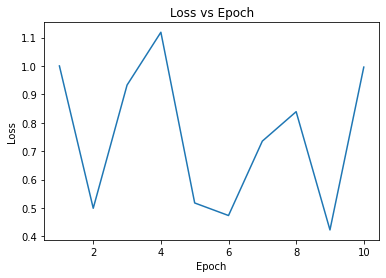

In [56]:
"""
TAREA: Grafique la perdida (loss) vs epochs
"""

plt.plot([i+1 for i in range(NUM_EPOCHS)], losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show()

In [11]:
"""
TAREA: Calcule la precisión del modelo (accuracy)
"""
correct = 0
total = 0

classifer_model.eval()

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        outputs = classifer_model(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total

classifer_model.train()

print(f'Para un las {len(test_set)} imágenes de test se tiene un Accuracy: {accuracy}%')

Para un las 10000 imágenes de test se tiene un Accuracy: 64.61%


**Responder aquí:**
*   Explica brevemente porque utilizamos torch.no_grad() y model.eval() cuando evaluamos modelos en Pytorch.

Utilizamos torch.no_grad() para deshabilitar el cálculo de gradientes en el _forward pass_ de la red, ya que no necesitamos
calcular gradientes en el set de prueba y esto ahorra memoria y tiempo de cómputo. Por otro lado, utilizamos model.eval()
para poner el modelo en modo de evaluación, lo que desactiva capas como el _dropout_ y _batch normalization_ que se utilizan
durante el entrenamiento, además de cambiar el comportamiento de algunas capas como _BatchNorm_ para que se comporten de manera
determinística.

.

## Pregunta 2: ResNet (50%)

## Actividad 4

In [8]:
"""
Instancie nuevamente los Data Loaders pero ahora con un batch 100
"""

batch_size = 100

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=4)

test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=4)

**Responder brevemente aquí:**

*   ¿Qué es el *batch_size* y en que influye su tamaño? Mencione ventajas y desventajas de utilizar batchs

El _batch_size_ es la cantidad de ejemplos que se utilizan para calcular el gradiente en cada paso de entrenamiento.
Un _batch_size_ grande permite aprovechar mejor la paralelización de la GPU y acelerar el entrenamiento, además de
hacer el entrenamiento más estable al promediar el gradiente de varios ejemplos. Sin embargo, un _batch_size_ grande
requiere de más memoria y puede hacer que el modelo no generalice bien a ejemplos nuevos. Por otro lado,
un _batch_size_ pequeño requiere de menos memoria y puede ayudar al modelo a generalizar
ya que se actualiza el gradiente con ejemplos más variados en cada paso, sin embargo, también
puede hacer que el entrenamiento sea más lento y menos estable.



In [9]:
"""
Vamos a utilizar CUDA para acelerar el entrenamiento, no olvide enviar sus
tensores y modelos con .to(device). Investigue cuando usar este metodo ya que
es muy importante usarlo correctamente
"""

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Deberia mostrar "cuda" y no "cpu"

cuda


## Actividad 5


In [10]:
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3,
                     stride=stride, padding=1, bias=False)

# ResidualBlock o BasicBlock
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        
        self.conv1 = conv3x3(in_channels, out_channels, stride)

        self.bn1 = nn.BatchNorm2d(out_channels)

        self.relu = nn.ReLU(inplace=True)

        self.conv2 = conv3x3(out_channels, out_channels)

        self.bn2 = nn.BatchNorm2d(out_channels)

        self.downsample = downsample

    def forward(self, x):
        residual = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)

        return out

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 64
        #### COMPLETAR AQUI ####
        self.conv = conv3x3(3, 64, 1) # 32x32x3 -> 32x32x64
        self.bn = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 64, layers[0]) # 32x32x64 -> 32x32x64
        self.layer2 = self.make_layer(block, 128, layers[1], 2) # 32x32x64 -> 16x16x128
        self.layer3 = self.make_layer(block, 256, layers[2], 2) # 16x16x128 -> 8x8x256
        self.layer4 = self.make_layer(block, 512, layers[3], 2) # 8x8x256 -> 4x4x512
        self.avg_pool = nn.AvgPool2d(2) # 4x4x512 -> 2x2x512
        self.fc = nn.Linear(2048, num_classes)
        ######################

    # NO MODIFICAR
    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        
        return out

In [11]:
"""
TAREA: Instancia el modelo y envialo a la GPU
Recuerda que es ResNet18
"""
from torchsummary import summary


resnet_model = ResNet(ResidualBlock, [2, 2, 2, 2])
resnet_model.to(device)
summary(resnet_model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,864
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
            Conv2d-7           [-1, 64, 32, 32]          36,864
       BatchNorm2d-8           [-1, 64, 32, 32]             128
              ReLU-9           [-1, 64, 32, 32]               0
    ResidualBlock-10           [-1, 64, 32, 32]               0
           Conv2d-11           [-1, 64, 32, 32]          36,864
      BatchNorm2d-12           [-1, 64, 32, 32]             128
             ReLU-13           [-1, 64, 32, 32]               0
           Conv2d-14           [-1, 64,

**Responder aquí:**

*   *¿Qué son los Residual Blocks y cuál es su impacto?*

Los Residual Blocks son bloques que se utilizan en las redes ResNet y permiten entrenar redes muy profundas.
Estos bloques permiten que el gradiente pueda fluir a través de la red sin desvanecerse, ya que el bloque
tiene una conexión directa entre la entrada y la salida del bloque.
Estos bloques solucionan el problema de degredación de la red, que es que a medida que la red se hace más profunda
el rendimiento de la red empeora, ya que se hace más difícil entrenar redes profundas debido a que
sufren problemas de entrenamiento y de optimización.


**Responder aquí:**

*   *¿Describa detalladamente que hace la función make_layers?*

La función _make_layers_ recibe como argumentos un bloque, una cantidad de canales de salida,
una cantidad de bloques por capa, y el _stride_. La función crea una capa de la red que consiste en
una secuencia de bloques del tipo que se le pasa como argumento. La cantidad de bloques que se crean
es la cantidad que se le pasa como argumento y sus características dependen de los argumentos que se
le pasan a la función (_out_channels_ y _stride_). Además la función tiene un _if_ que agrega una capa
de _downsampling_ en el caso de que el _stride_ sea mayor a 1 o que la cantidad de canales de salida sea
distinta a la cantidad de canales de entrada. El propósito de esta capa de _downsampling_ es reducir la
dimensión espacial de la imagen y aumentar la cantidad de canales de salida para que la entrada y la salida
de los bloques sean compatibles y de esta forma se pueda sumar la entrada con la salida del bloque 
residual.
 

## Actividad 6

In [12]:
"""
NO cambiar esta celda
"""

# Hyperparametros
NUM_EPOCHS = 20
LEARNING_RATE = 0.001

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet_model.parameters(), lr=LEARNING_RATE)

In [20]:
"""
Entrenamiento: utilice el modelo, el criterion y el optimizer para entrenar el modelo.
Deben utilizar GPU.
"""

total_step = len(train_loader)

for epoch in range(NUM_EPOCHS):
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = resnet_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                   .format(epoch+1, NUM_EPOCHS, i+1, total_step, loss.item()))

Epoch [1/20], Step [100/500] Loss: 1.8414
Epoch [1/20], Step [200/500] Loss: 1.7463
Epoch [1/20], Step [300/500] Loss: 1.1406
Epoch [1/20], Step [400/500] Loss: 1.2864
Epoch [1/20], Step [500/500] Loss: 1.2121
Epoch [2/20], Step [100/500] Loss: 0.9049
Epoch [2/20], Step [200/500] Loss: 0.8995
Epoch [2/20], Step [300/500] Loss: 0.8269
Epoch [2/20], Step [400/500] Loss: 0.9377
Epoch [2/20], Step [500/500] Loss: 0.8331
Epoch [3/20], Step [100/500] Loss: 0.6946
Epoch [3/20], Step [200/500] Loss: 0.8468
Epoch [3/20], Step [300/500] Loss: 0.5683
Epoch [3/20], Step [400/500] Loss: 0.4916
Epoch [3/20], Step [500/500] Loss: 0.4399
Epoch [4/20], Step [100/500] Loss: 0.5973
Epoch [4/20], Step [200/500] Loss: 0.4383
Epoch [4/20], Step [300/500] Loss: 0.5602
Epoch [4/20], Step [400/500] Loss: 0.5750
Epoch [4/20], Step [500/500] Loss: 0.4175
Epoch [5/20], Step [100/500] Loss: 0.2841
Epoch [5/20], Step [200/500] Loss: 0.5813
Epoch [5/20], Step [300/500] Loss: 0.3361
Epoch [5/20], Step [400/500] Loss:

In [21]:
PATH = './cifar_resnet_model.pth'
torch.save(resnet_model.state_dict(), PATH)

In [13]:
PATH = './cifar_resnet_model.pth'
resnet_model = ResNet(ResidualBlock, [2, 2, 2, 2])
resnet_model.load_state_dict(torch.load(PATH))
resnet_model.to(device)

ResNet(
  (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=

In [23]:
"""""
Evaluación: utilice el modelo para obtener la precisión
"""
correct = 0
total = 0

resnet_model.eval()

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        outputs = resnet_model(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total

resnet_model.train()

print(f'Para un las {len(test_set)} imágenes de test se tiene un Accuracy: {accuracy}%')

Para un las 10000 imágenes de test se tiene un Accuracy: 84.78%




Responder aquí:

*¿Qué es y que hacen en el entrenamiento de la red las variables optimizer y criterion?*

La variable _optimizer_ es la encargada de actualizar los pesos de la red en cada paso de entrenamiento
mediante un algoritmo de optimización. En este caso, se utiliza el algoritmo _Adam_ para actualizar los pesos
de la red mediante descenso de gradiente. Utiliza _learning_rates_ adaptativos para cada parámetro de la red y usa estimaciones
del primer y segundo momento del gradiente para actualizar el learning rate de cada parámetro.
Por otro lado, la variable _criterion_ es la función de pérdida que se utiliza para calcular el error de la red.
En este caso, se utiliza la función _CrossEntropyLoss_ que es una función de pérdida que se utiliza para problemas
de clasificación multiclase. Esta función calcula la pérdida entre las predicciones de la red y las etiquetas reales
de los ejemplos. Esta función es la que se utiliza para calcular el gradiente y actualizar los pesos de la red.

*¿Qué puede observar de la precisión del modelo? Analise el resultado.*

Se puede observar que la precisión es considerablemente mejor que la del modelo entrenado en la parte
1 de la tarea. Esto se debe a que la red ResNet es mucho más profunda y tiene conexiones residuales
que permiten que el gradiente fluya a través de la red, resolviendo el problema de la degradación de la red, como
se mencionó en la pregunta 5. Igualmente, este modelo de ResNet tiene 12,5 millones de parámetros,
mientras que el modelo CNN plano de la parte 1 tenía solamente 62 mil parámetros, y por ende, mucho
más capacidad de aprendizaje (dado que el problema de degradación fue resuelto).

## Object Detection (20%)

## Actividad 7

In [66]:
"""""
Traemos la libreria de YOLO ultralytics
"""

from IPython.display import clear_output, display, Image
import os
clear_output()

HOME = os.getcwd()
print(HOME)

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.4  Python-3.12.3 torch-2.3.0+cpu CPU (AMD Ryzen 5 3600 6-Core Processor)
Setup complete  (12 CPUs, 15.9 GB RAM, 210.5/465.1 GB disk)


In [73]:
from ultralytics import YOLO

""""
TAREA: Instancie el modelo YOLOv8 para segmentacion y obtenga la prediccion de la foto entregada
"""
image_to_predict = 'https://ultralytics.com/images/bus.jpg'

yolo_model = YOLO('yolov8s-seg.pt')

results = yolo_model.predict(image_to_predict, save=True, exist_ok=True)


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 c:\Users\Bruno\Desktop\ing\progra\DL\T1\bus.jpg: 640x480 4 persons, 1 bus, 1 tie, 1 skateboard, 173.0ms
Speed: 3.0ms preprocess, 173.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\segment\predict


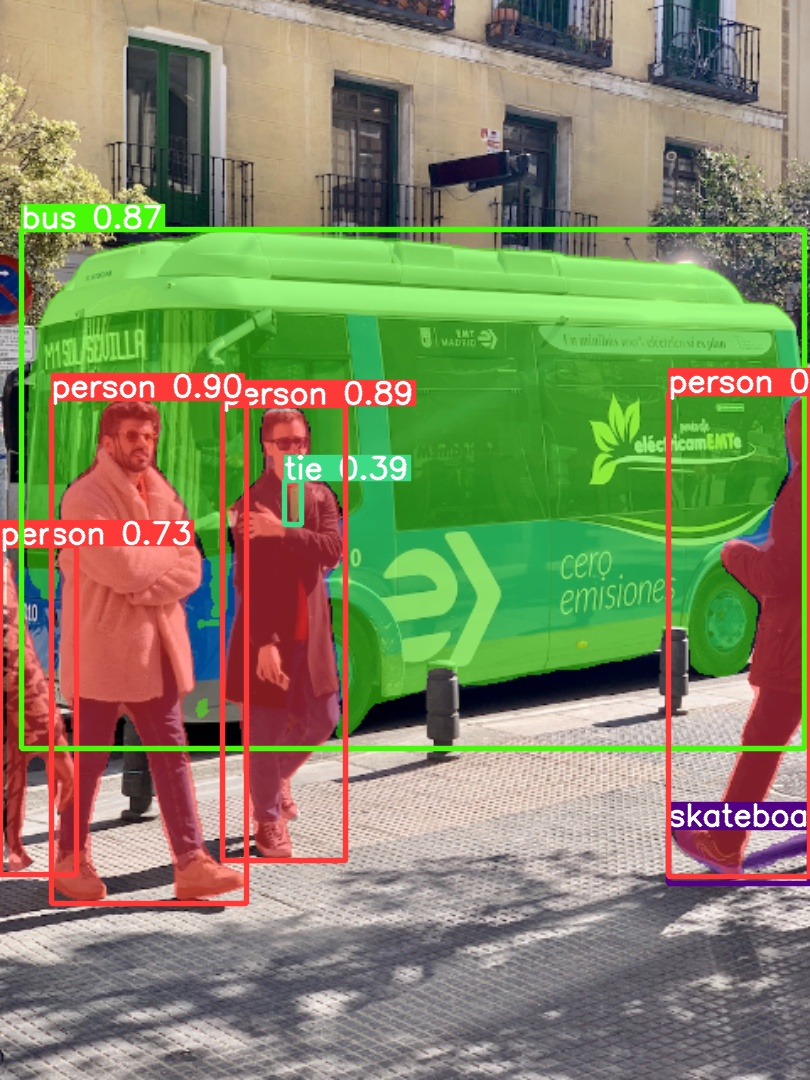

In [74]:
""""
TAREA: Muestra la foto segmentada por Yolov8 (puedes usar Image())
"""

import os

display(Image(os.path.join("runs", "segment", "predict", "bus.jpg")))

**Responder aquí:**

*   *¿Por qué utilizamos modelos pre-entrenados (pretrained)? ¿Cuáles son las ventajas y desventajas?*

Se utilizan modelos pre-entrenados para aprovechar el conocimiento que ya tienen los modelos sobre
un conjunto de datos grande y general. Esto permite que el modelo pueda generalizar mejor a nuevos
conjuntos de datos y acelerar el proceso de entrenamiento. Además, los modelos pre-entrenados
suelen tener una arquitectura más compleja y profunda que los modelos que se pueden entrenar desde cero,
lo que permite que el modelo pueda aprender _features_ más generales y complejas. Por otro lado, una desventaja
de utilizar modelos pre-entrenados es que pueden tener un _bias_ hacia los datos con los que fueron entrenados
y no generalizar bien a nuevos conjuntos de datos.

## Actividad 8

In [77]:
""""
TAREA: Ahora intenta utilizar un modelo pre-entrenado para segmentacion de las 3
imagenes de grietas
"""
import random

im1 = random.choice(os.listdir(os.path.join("data", "cracks-dataset", "valid", "images")))
im2 = random.choice(os.listdir(os.path.join("data", "cracks-dataset", "valid", "images")))
im3 = random.choice(os.listdir(os.path.join("data", "cracks-dataset", "valid", "images")))


image 1/1 c:\Users\Bruno\Desktop\ing\progra\DL\T1\data\cracks-dataset\valid\images\3579.rf.b41f05924c4bb0b53b4159b1b35c28b2.jpg: 640x640 1 tie, 230.0ms
Speed: 3.0ms preprocess, 230.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict


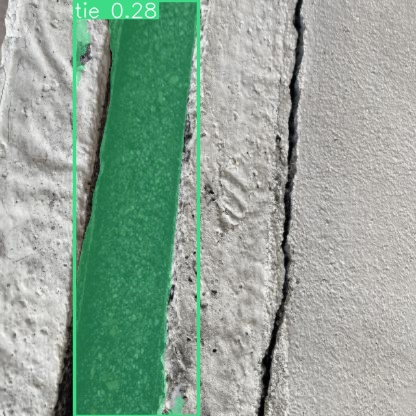


image 1/1 c:\Users\Bruno\Desktop\ing\progra\DL\T1\data\cracks-dataset\valid\images\3142.rf.f17f84ad2ef60da83407064ec39fecd1.jpg: 640x640 (no detections), 212.0ms
Speed: 3.0ms preprocess, 212.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict


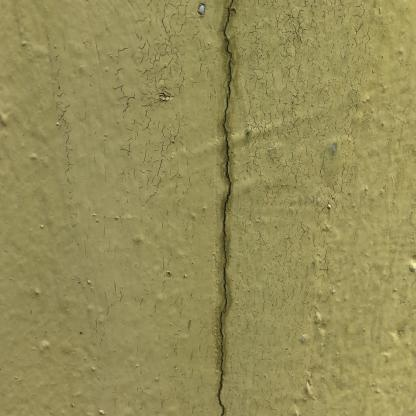


image 1/1 c:\Users\Bruno\Desktop\ing\progra\DL\T1\data\cracks-dataset\valid\images\1699.rf.c2735c330999d4f748d626678163e43d.jpg: 640x640 (no detections), 216.0ms
Speed: 4.0ms preprocess, 216.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict


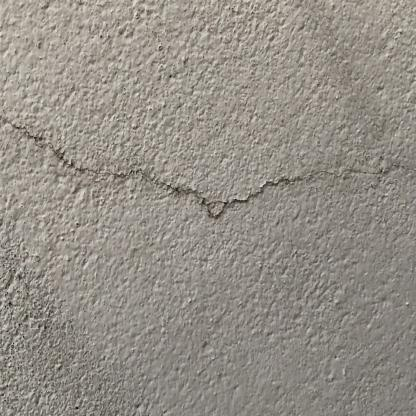

In [78]:
""""
TAREA: Muestra la foto segmentada por Yolov8
"""

images = [im1, im2, im3]

for image in images:
    image_path = os.path.join("data", "cracks-dataset", "valid", "images", image)
    results = yolo_model.predict(image_path, save=True, exist_ok=True)
    display(Image(os.path.join("runs", "segment", "predict", image)))

**Responder aquí:**

*   *¿Pudo reconocer el modelo las grietas? ¿Por qué pudo reconocer personas/buses y no las
grietas?*

Tu Respuesta...

.

.

## Actividad 9

In [ ]:
""""
TAREA: Ahora debes traer la data de las grietas
"""

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Nuestra carpeta con las imagenes de grietas
folder_path = '/content/drive/MyDrive/cracks-dataset'

In [ ]:
""""
TAREA: Ahora debes entrenar (fine-tune) el modelo YOLOv8 para segmentacion de una grietas
TIP esto puede tomar un tiempo y se debe usar GPU.
"""


In [ ]:
""""
TAREA: Muestra una foto de batch del entrenamiento
"""


In [ ]:
""""
TAREA: Ahora realiza una prediccion a la foto de la grieta inicial con el modelo entrenado
"""



In [ ]:
""""
TAREA: Muestra las fotos de la grietas segmentadas por Yolov8
"""

**Responder aquí:**

*   ¿Por qué ahora el modelo detecta las imágenes? Investigue y explique que es Fine Tunning.

Tu Respuesta...

Por último:

**Responder aquí:**

*   Explique el aporte del modelo Yolo a CV y sus principales innovaciones

Tu Respuesta...
.

.

.


*   De y explique 3 ejemplos de donde aplicar este tecnolgias y sus ventajas.

Tu Respuesta...
.

.

.



*   ¿Qué consideraciones se deben tener al aplicar CV en la vida real? Nombre algunos riesgos de utilizar CV

Tu Respuesta...
.

.

.



In [ ]:
"""
FIN :)
"""